In [1]:

from xenopict import Xenopict, magic
from rdkit import Chem
import rdkit.Chem.rdPartialCharges

import numpy as np


diclofenac = mol = Xenopict('O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')
rdkit.Chem.rdPartialCharges.ComputeGasteigerCharges(mol.mol)
shading = np.array([a.GetDoubleProp("_GasteigerCharge")  for a in mol.GetAtoms()])
shading = shading / abs(shading).max()  # partial charge (scaled to [-1, 1])

Xenopict.scale = 30

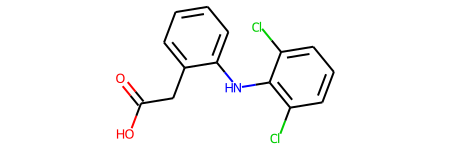

In [2]:
# Atom shading 
drawer = Xenopict(mol)
drawer.shade(shading)
drawer.halo()


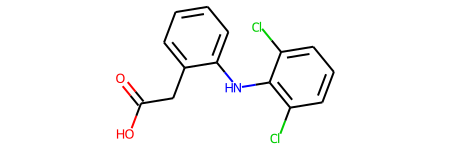

In [3]:
Xenopict(mol).shade(shading).halo()

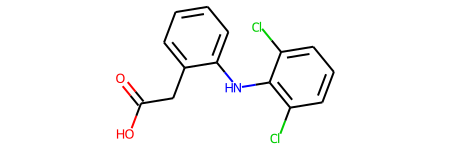

In [4]:
a1 = [b.GetBeginAtomIdx() for b in mol.GetBonds()]
a2 = [b.GetEndAtomIdx() for b in mol.GetBonds()]
bshading = (shading[a1] + shading[a2])  / 2

# Bond shading
drawer = Xenopict(mol)
drawer.shade(bond_shading=(a1, a2, bshading)).halo()

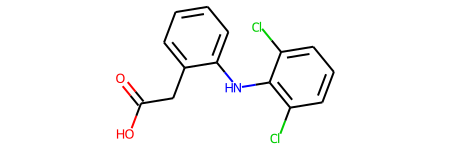

In [5]:
# Atom and bond shading togetehr
drawer = Xenopict(mol)
drawer.shade(shading, bond_shading=(a1, a2, bshading))
drawer.halo()

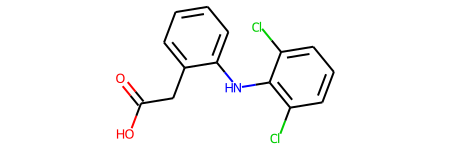

In [6]:
# Mark substructures (defined as a list of atom IDs)
drawer.mark_substructure([0,1,2,3, 10])

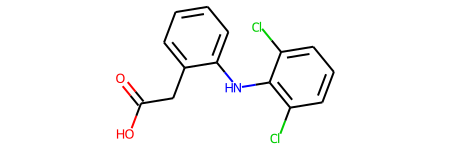

In [7]:
# Shade substructures
drawer = Xenopict(mol)
drawer.shade_substructure([[0,1,2,3], [7,8,9,10], [3,4,5,9]], [1, -0.65, 0.6])
drawer.halo()


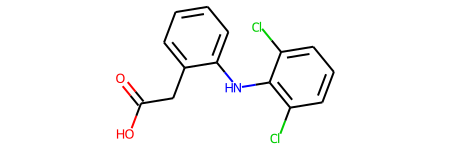

In [8]:
# Another one of the xenosite colormaps
Xenopict(mol, cmap="xenosite_pwo").shade(shading).halo()

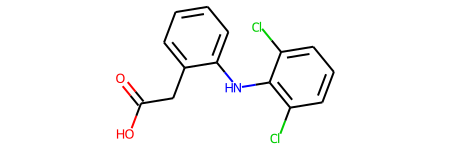

In [9]:
# any matplotlib colormap works, but most won't look as good as the default
Xenopict(mol, cmap="RdBu").shade(shading).halo()

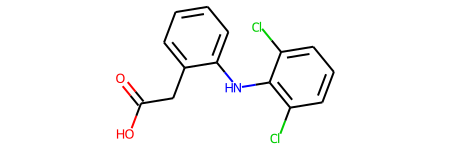

In [10]:
# depeict a substructure
drawer = Xenopict(mol)
drawer.substructure_focus([0,1,2,3])